In [1]:
__file__ = 'rad_zu_ord_fit.ipynb'
import sys
import pathlib
sys.path.append(str(pathlib.Path(__file__).absolute().parent.parent)+"/FP2_lib")
import functions as f
import os
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
from uncertainties import unumpy as up

In [2]:
with open('Data/Data.csv', mode='r') as tf:
    data = np.genfromtxt(tf,delimiter="\t").T

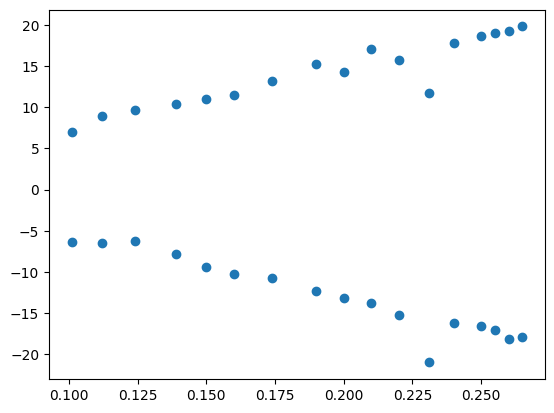

In [3]:
plt.scatter(data[0],data[3])

In [4]:
dat1 = []
mag1 = []
dat2 = []
mag2 = []
for i in range(len(data[0])):
    if i%2 == 0:
        mag1.append(data[0][i])
        dat1.append(data[3][i])
    elif i%2 != 0:
        mag2.append(data[0][i])
        dat2.append(data[3][i])

In [5]:
fillerr = np.full(len(dat1),0.1)
res1 = f.linear_fit(dat1,mag1,fillerr)
res2 = f.linear_fit(dat2,mag2,fillerr)

[[Model]]
    Model(linear)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 4
    # data points      = 17
    # variables        = 2
    chi-square         = 3141.52238
    reduced chi-square = 209.434825
    Akaike info crit   = 92.7272407
    Bayesian info crit = 94.3936673
    R-squared          = -8.10319231
[[Variables]]
    slope:     -81.2678962 +/- 6.64042605 (8.17%) (init = -81.2679)
    intercept:  2.82588045 +/- 1.32879690 (47.02%) (init = 2.82588)
[[Correlations]] (unreported correlations are < 0.100)
    C(slope, intercept) = -0.964
[[Model]]
    Model(linear)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 4
    # data points      = 17
    # variables        = 2
    chi-square         = 3357.11959
    reduced chi-square = 223.807973
    Akaike info crit   = 93.8556297
    Bayesian info crit = 95.5220564
    R-squared          = -11.7193095
[[Variables]]
    slope:      69.6437595 +/- 6.86450301 (9.86%) (init = 69.6

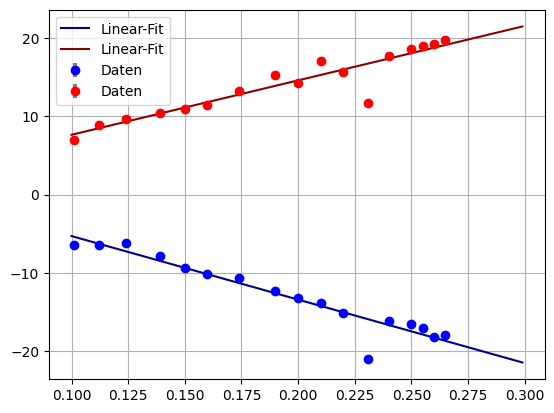

In [7]:
plt.plot(np.arange(0.1,0.3,0.001),res1.eval(x=np.arange(0.1,0.3,0.001)),color='darkblue',linestyle='-',alpha=1,label="Linear-Fit")
plt.plot(np.arange(0.1,0.3,0.001),res2.eval(x=np.arange(0.1,0.3,0.001)),color='darkred',linestyle='-',alpha=1,label="Linear-Fit")


plt.errorbar(mag1,dat1,yerr = fillerr,fmt='bo',ecolor='gray', elinewidth=3, capsize=0,label = 'Daten')
plt.errorbar(mag2,dat2,yerr = fillerr,fmt='ro',ecolor='gray', elinewidth=3, capsize=0,label = 'Daten')

plt.grid()
plt.legend()

print(res1.fit_report())
print(res2.fit_report())